In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data=pd.read_csv("housing.csv")

In [4]:
raw_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [6]:
data=raw_data.drop(['ocean_proximity'],axis=1) #axis=0 for rows,1 for cols
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [8]:
data_no_mv=data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


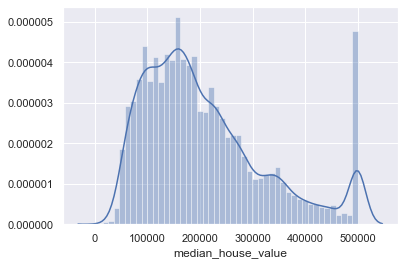

In [10]:
sns.distplot(data_no_mv['median_house_value'])

In [11]:
q=data_no_mv['median_house_value'].quantile(0.99) #actually a value
data_1=data_no_mv[data_no_mv['median_house_value']<q]
data_1.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000
mean,-119.564306,35.653372,28.378074,2620.491142,539.645751,1440.290732,501.093504,3.676739,192444.651913
std,2.006241,2.150250,12.515373,2184.938093,422.413200,1144.399323,383.206416,1.569263,97702.625782
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1441.000000,297.000000,796.000000,282.000000,2.526500,116500.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1178.000000,411.000000,3.451900,173800.000000
75%,-117.990000,37.730000,37.000000,3118.000000,648.000000,1743.000000,606.000000,4.583300,248100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


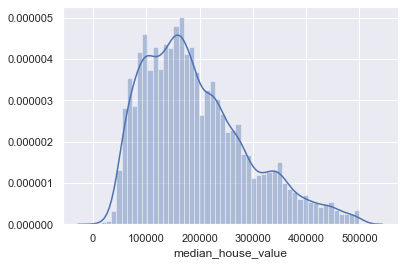

In [12]:
sns.distplot(data_1['median_house_value'])

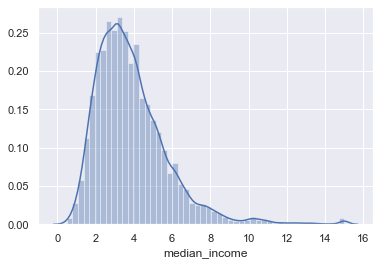

In [13]:
sns.distplot(data_no_mv['median_income'])

In [14]:
q=data_1['median_income'].quantile(0.99) #actually a value
data_2=data_1[data_no_mv['median_income']<q]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


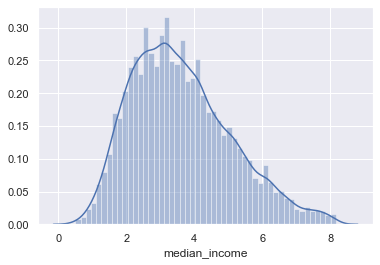

In [15]:
sns.distplot(data_2['median_income'])

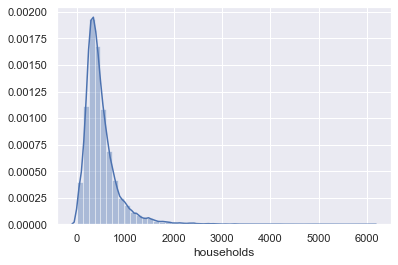

In [16]:
sns.distplot(data_no_mv['households'])

In [17]:
q=data_2['households'].quantile(0.99)
data_3=data_2[data_2['households']<q]

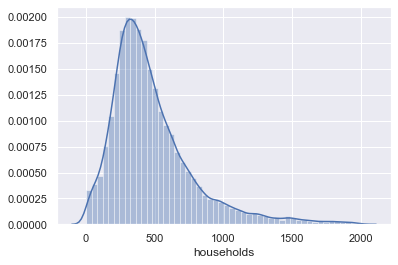

In [18]:
sns.distplot(data_3['households'])

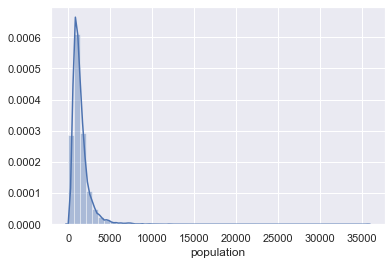

In [19]:
sns.distplot(data_no_mv['population'])

In [26]:
q=data_3['population'].quantile(0.99)
data_4=data_3[data_3['population']<q]

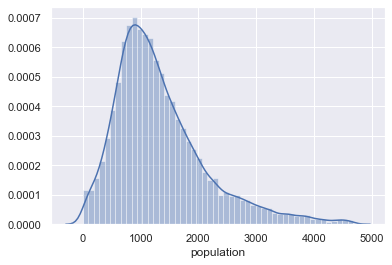

In [29]:
sns.distplot(data_4['population'])

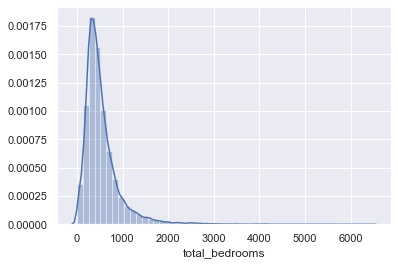

In [30]:
sns.distplot(data_no_mv['total_bedrooms'])

In [31]:
q=data_4['total_bedrooms'].quantile(0.99)
data_5=data_4[data_4['total_bedrooms']<q]

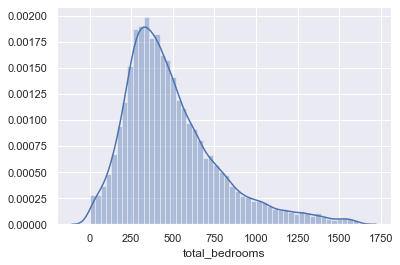

In [32]:
sns.distplot(data_5['total_bedrooms'])

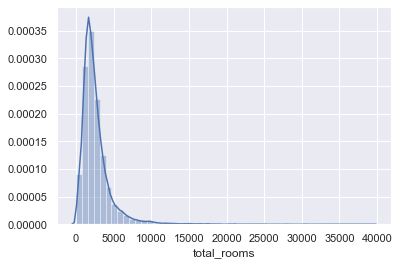

In [33]:
sns.distplot(data_no_mv['total_rooms'])

In [34]:
q=data_5['total_rooms'].quantile(0.99)
data_6=data_5[data_5['total_rooms']<q]

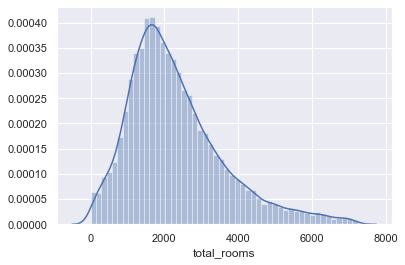

In [35]:
sns.distplot(data_6['total_rooms'])

In [43]:
data_cleaned=data_6.reset_index(drop=True)

In [44]:
data_cleaned.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18519.000000,18519.000000,18519.000000,18519.000000,18519.000000,18519.000000,18519.000000,18519.00000,18519.000000
mean,-119.586598,35.673067,29.012366,2308.096981,481.974891,1292.847886,450.035531,3.59494,189653.739187
std,2.004526,2.156385,12.302682,1301.030841,271.292576,734.332526,250.568475,1.45953,96089.256570
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.49990,14999.000000
25%,-121.780000,33.940000,19.000000,1412.500000,293.000000,783.500000,278.000000,2.50000,114300.000000
50%,-118.530000,34.280000,29.000000,2051.000000,425.000000,1151.000000,401.000000,3.39880,171400.000000
75%,-118.020000,37.730000,37.000000,2946.000000,616.000000,1658.000000,575.000000,4.50795,244150.000000
max,-114.310000,41.950000,52.000000,7241.000000,1612.000000,4660.000000,1574.000000,8.16110,500000.000000


In [45]:
raw_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


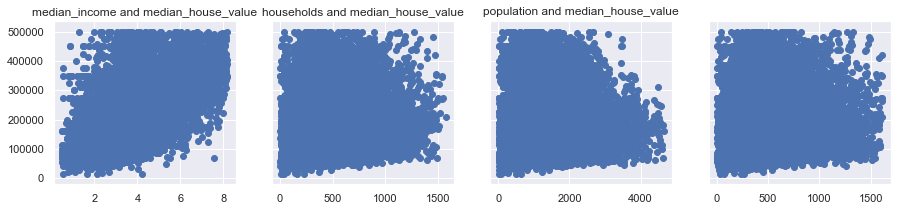

In [58]:
f,(ax1,ax2,ax3,ax4,)=plt.subplots(1, 4,sharey=True ,figsize=(15,3))
ax1.scatter(data_cleaned['median_income'],data_cleaned['median_house_value'])
ax1.set_title('median_income and median_house_value')
ax2.scatter(data_cleaned['households'],data_cleaned['median_house_value'])
ax2.set_title('households and median_house_value')
ax3.scatter(data_cleaned['population'],data_cleaned['median_house_value'])
ax3.set_title('population and median_house_value')
ax4.scatter(data_cleaned['total_bedrooms'],data_cleaned['median_house_value'])


plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA35E5BC08>,
      dtype=object)

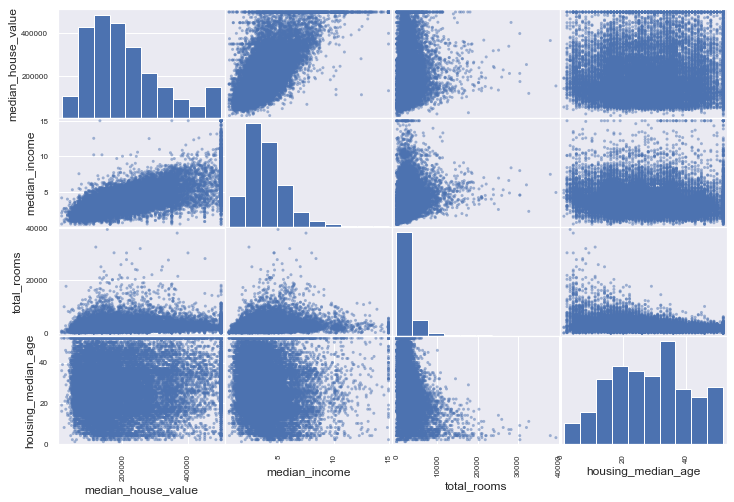

In [59]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(data[attributes], figsize=(12,8))

In [62]:
log_value=np.log(data_cleaned['median_house_value'])
data_cleaned['log_median_house_value']=log_value
data_cleaned


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,log_house_val,log_median_house_value
0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,12.771671,12.771671
1,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,12.740517,12.740517
2,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,12.743151,12.743151
3,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,12.505066,12.505066
4,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,12.608868,12.608868
...,...,...,...,...,...,...,...,...,...,...,...
18514,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,11.265745,11.265745
18515,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,11.252859,11.252859
18516,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,11.432799,11.432799
18517,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,11.346871,11.346871


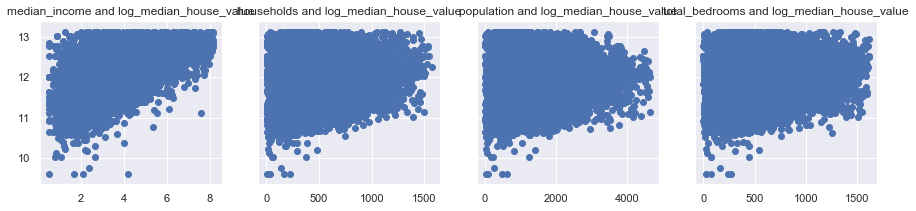

In [63]:
f,(ax1,ax2,ax3,ax4,)=plt.subplots(1, 4,sharey=True ,figsize=(15,3))
ax1.scatter(data_cleaned['median_income'],data_cleaned['log_median_house_value'])
ax1.set_title('median_income and log_median_house_value')
ax2.scatter(data_cleaned['households'],data_cleaned['log_median_house_value'])
ax2.set_title('households and log_median_house_value')
ax3.scatter(data_cleaned['population'],data_cleaned['log_median_house_value'])
ax3.set_title('population and log_median_house_value')
ax4.scatter(data_cleaned['total_bedrooms'],data_cleaned['log_median_house_value'])
ax4.set_title('total_bedrooms and log_median_house_value')

plt.show()